Trabajaremos con la base ya procesada, y abrimos la otra de referencia:

In [1]:
import pandas as pd
import numpy as np
path="C:/Users/HUGO/Desktop/Maestria en CIENCIA DE DATOS UANL/Aprendizaje automatico/"
pd.set_option("display.max_columns",None)

In [38]:
loansprev=pd.read_csv(path+"loansmodified3.csv")
loans_dummies=pd.read_csv(path+"loans_dummies.csv")
loans_dummies #ya escalada

,Term,NoEmp,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,timediff,NewExist_2.0,UrbanRural_2.0,RevLineCr_1.0,same_state_1.0,LowDoc_1,CreateJob_1,RetainedJob_1,NAICS_cat2_Construction,NAICS_cat2_Health care and social assistance,NAICS_cat2_Manufacturing,NAICS_cat2_Other,"NAICS_cat2_Professional, scientific, and technical services",NAICS_cat2_Retail
0,0.082601,0.002500,0.002963,0.0,0.006996,0.010003,0.005912,0.910632,0,1,1,0,0,0,0,1,0,0,0,0,0
1,0.105448,0.000250,0.011089,0.0,0.000000,0.035010,0.020692,0.278505,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.147627,0.000875,0.001529,0.0,0.000000,0.005590,0.003304,0.254622,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0.084359,0.000125,0.001052,0.0,0.000000,0.004119,0.002434,0.241525,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.147627,0.006876,0.009368,0.0,0.000000,0.029715,0.017562,0.248844,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313089,0.024605,0.003125,0.001052,0.0,0.003736,0.004119,0.004260,0.232280,0,0,0,0,0,1,1,0,1,0,0,0,0
313090,0.442882,0.000625,0.081073,0.0,0.000000,0.250397,0.222074,0.232280,1,1,0,0,0,0,1,0,0,0,1,0,0
313091,0.147627,0.000125,0.001052,0.0,0.000000,0.004119,0.004260,0.232280,0,0,0,0,0,0,1,0,0,0,1,0,0
313092,0.147627,0.000625,0.000096,0.0,0.000000,0.001177,0.001304,0.232280,0,0,0,0,0,1,1,0,0,0,1,0,0


In [3]:
loans["paid"].value_counts(normalize=True)

1.0    0.821325
0.0    0.178675
Name: paid, dtype: float64

In [4]:
loans["paid"].value_counts()

1.0    257152
0.0     55942
Name: paid, dtype: int64

In [78]:
# Primero importamos un montón de modelos 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [73]:
#dealing oversampling
loans_dummies["paid"]=loansprev["paid"]
loans_balancedp2=loans_dummies[loans_dummies["paid"]==0]
loans_s2=loans_dummies[loans_dummies["paid"]==1].sample(len(loans_balancedp2))
loans_balanced2=pd.concat([loans_balancedp2,loans_s2])
loans_balanced2.reset_index(inplace=True)
loans_balanced2.drop("index",axis=1,inplace=True)
loans_balanced2

,Term,NoEmp,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,timediff,NewExist_2.0,UrbanRural_2.0,RevLineCr_1.0,same_state_1.0,LowDoc_1,CreateJob_1,RetainedJob_1,NAICS_cat2_Construction,NAICS_cat2_Health care and social assistance,NAICS_cat2_Manufacturing,NAICS_cat2_Other,"NAICS_cat2_Professional, scientific, and technical services",NAICS_cat2_Retail,paid
0,0.082601,0.002500,0.002963,0.0,0.006996,0.010003,0.005912,0.910632,0,1,1,0,0,0,0,1,0,0,0,0,0,0.0
1,0.056239,0.000375,0.004397,0.0,0.025492,0.014416,0.008520,0.241911,1,0,1,0,0,0,0,0,1,0,0,0,0,0.0
2,0.028120,0.000750,0.001529,0.0,0.002637,0.005590,0.003304,0.264638,0,0,1,1,0,0,0,0,0,0,0,0,1,0.0
3,0.007030,0.001000,0.009100,0.0,0.050573,0.029126,0.017214,0.243837,0,0,1,1,0,0,0,0,0,0,0,1,0,0.0
4,0.021090,0.000125,0.004564,0.0,0.024594,0.029126,0.017214,0.246918,0,0,1,1,0,0,0,0,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111879,0.210896,0.000500,0.030207,0.0,0.000000,0.108561,0.096331,0.246533,0,0,0,1,0,1,1,0,0,0,1,0,0,1.0
111880,0.084359,0.000625,0.014343,0.0,0.000000,0.025184,0.014884,0.256549,0,0,1,0,0,1,1,0,0,1,0,0,0,1.0
111881,0.147627,0.000625,0.023516,0.0,0.000000,0.073257,0.065032,0.263097,0,0,0,0,0,0,1,0,0,0,0,0,1,1.0
111882,0.105448,0.000625,0.000574,0.0,0.000000,0.007061,0.004173,0.244607,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0


In [75]:
loans_balanced2.paid.value_counts()

1.0    55942
0.0    55942
Name: paid, dtype: int64

In [74]:
loans_balanced2

,Term,NoEmp,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,timediff,NewExist_2.0,UrbanRural_2.0,RevLineCr_1.0,same_state_1.0,LowDoc_1,CreateJob_1,RetainedJob_1,NAICS_cat2_Construction,NAICS_cat2_Health care and social assistance,NAICS_cat2_Manufacturing,NAICS_cat2_Other,"NAICS_cat2_Professional, scientific, and technical services",NAICS_cat2_Retail,paid
0,0.082601,0.002500,0.002963,0.0,0.006996,0.010003,0.005912,0.910632,0,1,1,0,0,0,0,1,0,0,0,0,0,0.0
1,0.056239,0.000375,0.004397,0.0,0.025492,0.014416,0.008520,0.241911,1,0,1,0,0,0,0,0,1,0,0,0,0,0.0
2,0.028120,0.000750,0.001529,0.0,0.002637,0.005590,0.003304,0.264638,0,0,1,1,0,0,0,0,0,0,0,0,1,0.0
3,0.007030,0.001000,0.009100,0.0,0.050573,0.029126,0.017214,0.243837,0,0,1,1,0,0,0,0,0,0,0,1,0,0.0
4,0.021090,0.000125,0.004564,0.0,0.024594,0.029126,0.017214,0.246918,0,0,1,1,0,0,0,0,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111879,0.210896,0.000500,0.030207,0.0,0.000000,0.108561,0.096331,0.246533,0,0,0,1,0,1,1,0,0,0,1,0,0,1.0
111880,0.084359,0.000625,0.014343,0.0,0.000000,0.025184,0.014884,0.256549,0,0,1,0,0,1,1,0,0,1,0,0,0,1.0
111881,0.147627,0.000625,0.023516,0.0,0.000000,0.073257,0.065032,0.263097,0,0,0,0,0,0,1,0,0,0,0,0,1,1.0
111882,0.105448,0.000625,0.000574,0.0,0.000000,0.007061,0.004173,0.244607,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0


In [82]:
X = loans_balanced2.drop(["paid","ChgOffPrinGr"],axis=1)
Y = loans_balanced2[['paid']]

In [83]:
X_test, X_train, y_test, y_train = train_test_split(X, Y, test_size=0.80,random_state=12) # 75% training and 25% test


In [84]:
y_train['paid'].value_counts() #more balanced

0.0    44772
1.0    44736
Name: paid, dtype: int64

In [105]:
len(y_test)

22376

In [85]:
#RandomForestClassifier
loan_RFC=RandomForestClassifier(n_estimators=100,random_state=12)
loan_RFC.fit(X_train,y_train)

C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(random_state=12)

In [86]:
#Predict the response for test dataset
y_pred = loan_RFC.predict(X_test)

In [87]:
from sklearn.metrics import classification_report, confusion_matrix

#accuracy of the model:
cmrf=confusion_matrix(y_test, y_pred)
                       
def acc(cm):
    
    acc=(cm[0][0]+cm[1][1])/cm.sum()
    return(acc) 

acc(cmrf)  #96.26%

0.8982391848409009

In [91]:
cmrf

array([[10020,  1150],
       [ 1127, 10079]], dtype=int64)

In [104]:
10020+1150+1127+10079

22376

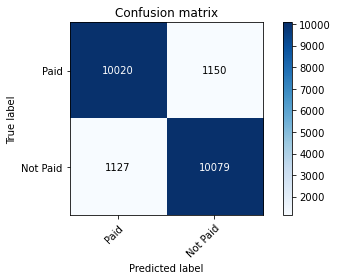

In [92]:
import matplotlib.pyplot as plt

# Define class labels
class_names = ['Paid', 'Not Paid']

# Plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cmrf, cmap=plt.cm.Blues)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Add ticks
ax.set(xticks=np.arange(cmrf.shape[1]),
       yticks=np.arange(cmrf.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate tick labels and set alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(cmrf.shape[0]):
    for j in range(cmrf.shape[1]):
        ax.text(j, i, format(cmrf[i, j], 'd'),
                ha="center", va="center",
                color="white" if cmrf[i, j] > cmrf.max() / 2. else "black")

fig.tight_layout()
plt.show()

In [94]:
fig.savefig(path+'confusion_matrix.png', dpi=300)

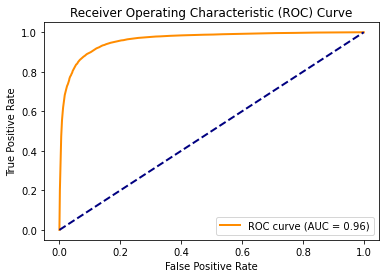

In [108]:
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification


# Generate synthetic data for classification
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)


# Predict probabilities for the test data
y_score = loan_RFC.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Compute area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig(path+'roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()


In [88]:
#Hacemos cross validation para asegurarnos de que el accuracy es alto
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Perform cross-validation
scores = cross_val_score(loan_RFC, X, Y, cv=kf, scoring='accuracy')

# Compute the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)

# Print the mean and standard deviation of the scores
print('Mean accuracy:', mean_score)
print('Standard deviation:', std_score)

C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\sklearn\model_selection\_validation.py:

Mean accuracy: 0.8999767437193583
Standard deviation: 0.0016634720652195145


In [15]:
#De otra manera
scores = cross_val_score(loan_RFC, X, Y, cv=10)
scores
#array([0.94879518, 0.95858434, 0.96385542, 0.99472892, 0.99397136,
#       0.99397136, 0.99472494, 0.99698568, 0.71891485, 0.50791258])

C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\sklearn\model_selection\_validation.py:

array([0.86915721, 0.9271606 , 0.87612834, 0.84359639, 0.87727923,
       0.90328924, 0.91732213, 0.90212728, 0.89533429, 0.88353593])

In [16]:
print("%0.4f mean accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))


0.8895 mean accuracy with a standard deviation of 0.0234


In [95]:
#feature importance:
importances=loan_RFC.feature_importances_

# summarize feature importance
for i,v in zip(X_train.columns,enumerate(importances)):
    print('Feature: {}, Score: {}'.format(i,v))

Feature: Term, Score: (0, 0.5840465768752703)
Feature: NoEmp, Score: (1, 0.04649786369412541)
Feature: DisbursementGross, Score: (2, 0.06391017633885758)
Feature: BalanceGross, Score: (3, 0.0)
Feature: GrAppv, Score: (4, 0.05234432678595602)
Feature: SBA_Appv, Score: (5, 0.06535643418137803)
Feature: timediff, Score: (6, 0.07880660604367062)
Feature: NewExist_2.0, Score: (7, 0.009627018957955381)
Feature: UrbanRural_2.0, Score: (8, 0.007772239168037301)
Feature: RevLineCr_1.0, Score: (9, 0.011595399656107716)
Feature: same_state_1.0, Score: (10, 0.02839545945434773)
Feature: LowDoc_1, Score: (11, 0.0037042339807370726)
Feature: CreateJob_1, Score: (12, 0.009157496567550518)
Feature: RetainedJob_1, Score: (13, 0.007398622546526175)
Feature: NAICS_cat2_Construction, Score: (14, 0.004362235446085722)
Feature: NAICS_cat2_Health care and social assistance, Score: (15, 0.004415193743058121)
Feature: NAICS_cat2_Manufacturing, Score: (16, 0.004668952654935905)
Feature: NAICS_cat2_Other, Score:

In [96]:
# sort feature importance in descending order
sorted_indices = importances.argsort()[::-1]

# summarize feature importance
for i in sorted_indices:
    print('Feature: {}, Score: {}'.format(X_train.columns[i], importances[i]))

Feature: Term, Score: 0.5840465768752703
Feature: timediff, Score: 0.07880660604367062
Feature: SBA_Appv, Score: 0.06535643418137803
Feature: DisbursementGross, Score: 0.06391017633885758
Feature: GrAppv, Score: 0.05234432678595602
Feature: NoEmp, Score: 0.04649786369412541
Feature: same_state_1.0, Score: 0.02839545945434773
Feature: RevLineCr_1.0, Score: 0.011595399656107716
Feature: NewExist_2.0, Score: 0.009627018957955381
Feature: CreateJob_1, Score: 0.009157496567550518
Feature: UrbanRural_2.0, Score: 0.007772239168037301
Feature: NAICS_cat2_Other, Score: 0.007754304254493166
Feature: RetainedJob_1, Score: 0.007398622546526175
Feature: NAICS_cat2_Retail, Score: 0.006039853828158905
Feature: NAICS_cat2_Manufacturing, Score: 0.004668952654935905
Feature: NAICS_cat2_Health care and social assistance, Score: 0.004415193743058121
Feature: NAICS_cat2_Construction, Score: 0.004362235446085722
Feature: NAICS_cat2_Professional, scientific, and technical services, Score: 0.00414700582274842

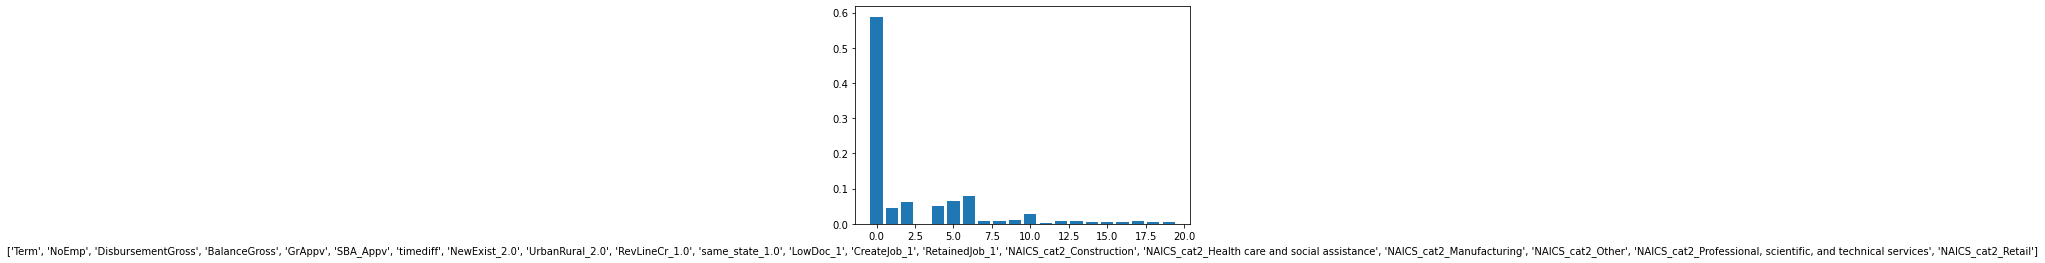

In [20]:
# plot feature importance
import matplotlib.pyplot as plt

plt.bar([x for x in range(len(importances))], importances)
plt.xlabel([x for x in X_train.columns])
plt.show()

# Diseño de experimentos

In [ ]:
#ChgOffPrinGr WAS THE VARIABLE OF TROUBLE 

## Experiment 

In [45]:
#load loans unbalanced:
loans=pd.read_csv(path+"loansmodified4.csv")
#dealing oversampling
loans["paid"]=loansprev["paid"]
loans_balancedp=loans[loans["paid"]==0]
loans_s=loans[loans["paid"]==1].sample(len(loans_balancedp))
loans_balanced=pd.concat([loans_balancedp,loans_s])
loans_balanced.reset_index(inplace=True)
loans_balanced.drop("index",axis=1,inplace=True)
loans_balanced

loans_balanced= loans_balanced.loc[:, loans_balanced2.columns]

loans_balanced

,Term,NoEmp,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,timediff,NewExist_2.0,UrbanRural_2.0,RevLineCr_1.0,same_state_1.0,LowDoc_1,CreateJob_1,RetainedJob_1,NAICS_cat2_Construction,NAICS_cat2_Health care and social assistance,NAICS_cat2_Manufacturing,NAICS_cat2_Other,"NAICS_cat2_Professional, scientific, and technical services",NAICS_cat2_Retail,paid
0,47,20,35000,0,13722,35000,17500,152236800,0,1,1,0,0,0,0,1,0,0,0,0,0,0.0
1,32,3,50000,0,50000,50000,25000,2246400,1,0,1,0,0,0,0,0,1,0,0,0,0,0.0
2,16,6,20000,0,5172,20000,10000,7344000,0,0,1,1,0,0,0,0,0,0,0,0,1,0.0
3,4,8,99193,0,99193,100000,50000,2678400,0,0,1,1,0,0,0,0,0,0,0,1,0,0.0
4,12,1,51746,0,48239,100000,50000,3369600,0,0,1,1,0,0,0,0,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111879,240,20,336000,0,0,336000,336000,16761600,1,1,0,1,0,1,0,0,0,1,0,0,0,1.0
111880,84,10,116000,0,0,116000,98600,12096000,0,0,0,1,0,0,0,0,0,0,0,1,0,1.0
111881,60,15,112000,0,0,112000,56000,3628800,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0
111882,84,1,33431,0,0,30000,15000,1296000,0,1,1,0,0,0,1,0,0,0,0,1,0,1.0


In [47]:
loans_balanced["ChgOffPrinGr"].describe()

count    1.118840e+05
mean     3.753163e+04
std      1.014208e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.197500e+03
75%      3.411175e+04
max      1.961398e+06
Name: ChgOffPrinGr, dtype: float64

In [49]:
mean=loans_balanced["ChgOffPrinGr"].mean()
mean

37531.6345143184

In [59]:
x1,x2=np.quantile(loans_balanced["ChgOffPrinGr"],[0.5,0.75])
x2

34111.75

In [60]:
# Define the levels of the independent variable
loans_balanced['quantile_level_chgdoff'] = np.nan
#loans_balanced.drop("quantile_level_chgdoff",axis=1,inplace=True)
loans_balanced.loc[loans_balanced["ChgOffPrinGr"]<=x1,"quantile_level_chgdoff"]="Chgdoff low"
loans_balanced.loc[(loans_balanced["ChgOffPrinGr"]>x1)&(loans_balanced["ChgOffPrinGr"]<=x2),"quantile_level_chgdoff"]="Chgdoff medium"
loans_balanced.loc[loans_balanced["ChgOffPrinGr"]>x2,"quantile_level_chgdoff"]="Chgdoff high"


# Define the treatments of the dependent variable
loans_balanced["dependent_treatment"]=loans_balanced['quantile_level_chgdoff']+"_Paid:"+loans_balanced["paid"].astype(str)
loans_balanced

,Term,NoEmp,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,timediff,NewExist_2.0,UrbanRural_2.0,RevLineCr_1.0,same_state_1.0,LowDoc_1,CreateJob_1,RetainedJob_1,NAICS_cat2_Construction,NAICS_cat2_Health care and social assistance,NAICS_cat2_Manufacturing,NAICS_cat2_Other,"NAICS_cat2_Professional, scientific, and technical services",NAICS_cat2_Retail,paid,quantile_level_chgdoff,dependent_treatment
0,47,20,35000,0,13722,35000,17500,152236800,0,1,1,0,0,0,0,1,0,0,0,0,0,0.0,Chgdoff medium,Chgdoff medium_Paid:0.0
1,32,3,50000,0,50000,50000,25000,2246400,1,0,1,0,0,0,0,0,1,0,0,0,0,0.0,Chgdoff high,Chgdoff high_Paid:0.0
2,16,6,20000,0,5172,20000,10000,7344000,0,0,1,1,0,0,0,0,0,0,0,0,1,0.0,Chgdoff medium,Chgdoff medium_Paid:0.0
3,4,8,99193,0,99193,100000,50000,2678400,0,0,1,1,0,0,0,0,0,0,0,1,0,0.0,Chgdoff high,Chgdoff high_Paid:0.0
4,12,1,51746,0,48239,100000,50000,3369600,0,0,1,1,0,0,0,0,0,1,0,0,0,0.0,Chgdoff high,Chgdoff high_Paid:0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111879,240,20,336000,0,0,336000,336000,16761600,1,1,0,1,0,1,0,0,0,1,0,0,0,1.0,Chgdoff low,Chgdoff low_Paid:1.0
111880,84,10,116000,0,0,116000,98600,12096000,0,0,0,1,0,0,0,0,0,0,0,1,0,1.0,Chgdoff low,Chgdoff low_Paid:1.0
111881,60,15,112000,0,0,112000,56000,3628800,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0,Chgdoff low,Chgdoff low_Paid:1.0
111882,84,1,33431,0,0,30000,15000,1296000,0,1,1,0,0,0,1,0,0,0,0,1,0,1.0,Chgdoff low,Chgdoff low_Paid:1.0


In [62]:
loans_balanced["dependent_treatment"].value_counts()

Chgdoff low_Paid:1.0       55515
Chgdoff high_Paid:0.0      27924
Chgdoff medium_Paid:0.0    27591
Chgdoff low_Paid:0.0         427
Chgdoff medium_Paid:1.0      380
Chgdoff high_Paid:1.0         47
Name: dependent_treatment, dtype: int64

In [65]:
loans_balanced.quantile_level_chgdoff.value_counts()

Chgdoff low       55942
Chgdoff medium    27971
Chgdoff high      27971
Name: quantile_level_chgdoff, dtype: int64

In [66]:
print("Chgdoff low "  , (loans_balanced[loans_balanced["quantile_level_chgdoff"]=="Chgdoff low"]["paid"].value_counts()))
print("Chgdoff medium "  , (loans_balanced[loans_balanced["quantile_level_chgdoff"]=="Chgdoff medium"]["paid"].value_counts()))
print("Chgdoff high "  , (loans_balanced[loans_balanced["quantile_level_chgdoff"]=="Chgdoff high"]["paid"].value_counts()))

Chgdoff low  1.0    55515
0.0      427
Name: paid, dtype: int64
Chgdoff medium  0.0    27591
1.0      380
Name: paid, dtype: int64
Chgdoff high  0.0    27924
1.0       47
Name: paid, dtype: int64


In [70]:
#### Test

from scipy.stats import chi2_contingency

# crear una tabla de contingencia con los casos exitosos y no exitosos para cada muestra
table = [[55515, 427], [380, 27591], [47, 27924]]

# realizar la prueba de chi-cuadrado
stat, pval, dof, expected = chi2_contingency(table)

print('Estadístico de chi-cuadrado:', stat)
print("Degrees of freedom: " ,dof)
print('Valor p:', pval)

Estadístico de chi-cuadrado: 108502.00286010513
Degrees of freedom:  2
Valor p: 0.0
